<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week15-pca/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

pca.explained_variance_ratio_ [0.97 0.03]
cumsum of variance [0.97 1.00]
eigenvalues =  [6.69 0.24]
eigenvectors  [[0.69 0.72]
 [0.72 -0.69]]


(0.7, 7.3, 2.75, 8.25)

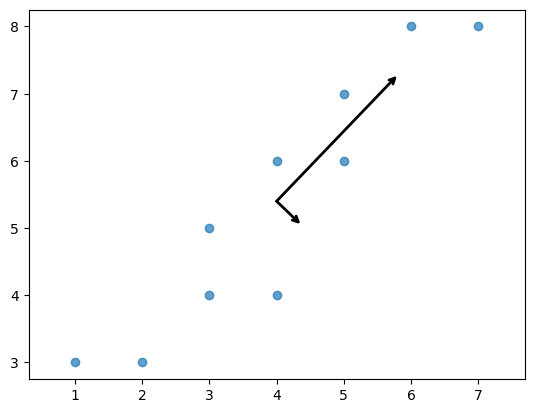

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

#X = np.array([[19.0, 63.0], [39.0, 74.0], [30.0, 87.0], [30.0, 23.0], [15.0, 35.0], [15.0, 43.0], [15.0,32.0],[30.0,73.0]])
X = np.array([[1.0,3.0],
              [2.0,3.0],
              [3.0,4.0],
              [3.0,5.0],
              [4.0,4.0],
              [4.0,6.0],
              [5.0,6.0],
              [5.0,7.0],
              [6.0,8.0],
              [7.0,8.0]])
pca = PCA(n_components=2)
pca.fit(X)

print("pca.explained_variance_ratio_", pca.explained_variance_ratio_)
cs = np.cumsum(pca.explained_variance_ratio_)
print("cumsum of variance", cs)
print("eigenvalues = ", pca.explained_variance_)
print("eigenvectors ", pca.components_)
#print(pca.fit_transform(X))

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

Implement of Page 14 in lecture

In [2]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print(X_pca)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

[[-3.81]
 [-3.12]
 [-1.70]
 [-0.98]
 [-1.01]
 [0.43]
 [1.13]
 [1.85]
 [3.26]
 [3.95]]
original shape:    (10, 2)
transformed shape: (10, 1)


Page 16 of lecture

X_approx [[1.36 2.65]
 [1.84 3.15]
 [2.82 4.17]
 [3.32 4.69]
 [3.30 4.67]
 [4.30 5.71]
 [4.78 6.21]
 [5.28 6.73]
 [6.26 7.75]
 [6.74 8.25]]
X_original [[1.00 3.00]
 [2.00 3.00]
 [3.00 4.00]
 [3.00 5.00]
 [4.00 4.00]
 [4.00 6.00]
 [5.00 6.00]
 [5.00 7.00]
 [6.00 8.00]
 [7.00 8.00]]


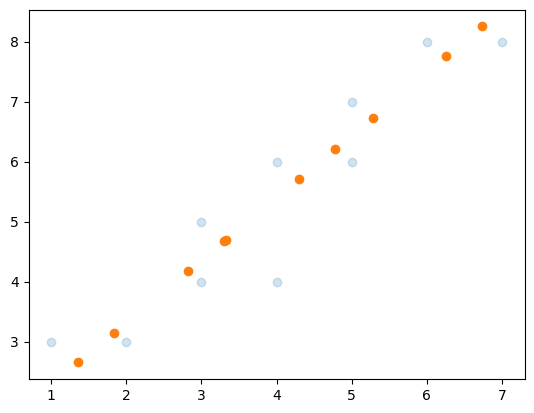

In [3]:
X_approx = pca.inverse_transform(X_pca)
print("X_approx", X_approx)
print("X_original",X)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
#ต้องปัดทศนิยมก่อน Ceil function
plt.scatter(X_approx[:, 0], X_approx[:, 1], alpha=1)
plt.show()
#plt.axis('equal');

# Implement PCA from scratch

In [4]:
import numpy as np
from scipy import linalg as LA

#array([[19.0, 63.0], [39.0, 74.0], [30.0, 87.0], [30.0, 23.0], [15.0, 35.0], [15.0, 43.0], [15.0,32.0],[30.0,73.0]])

# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x)-1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix 
#X -= np.mean(X, axis = 0) 
#print(X)
cc = cov_mat(X.T) # (or with np.cov(X.T))
print(cc)
#centering the data

print(X)

evals , evecs = LA.eigh(cc)
print("evecs ",evecs)
print("evals ",evals)

[[3.33 3.22]
 [3.22 3.60]]
[[1.00 3.00]
 [2.00 3.00]
 [3.00 4.00]
 [3.00 5.00]
 [4.00 4.00]
 [4.00 6.00]
 [5.00 6.00]
 [5.00 7.00]
 [6.00 8.00]
 [7.00 8.00]]
evecs  [[-0.72 0.69]
 [0.69 0.72]]
evals  [0.24 6.69]


# Projection step

In [5]:
#idx = np.argsort(evals)[::-1]
#evecs = evecs[:,idx]
#evals = evals[idx]
e2 = np.array([evecs[1,:]])
print("e2 ",e2)
X -= np.mean(X, axis = 0) 
print(X)
a = np.dot(e2,X.T) 
print(a.T)

e2  [[0.69 0.72]]
[[-3.00 -2.40]
 [-2.00 -2.40]
 [-1.00 -1.40]
 [-1.00 -0.40]
 [0.00 -1.40]
 [0.00 0.60]
 [1.00 0.60]
 [1.00 1.60]
 [2.00 2.60]
 [3.00 2.60]]
[[-3.81]
 [-3.12]
 [-1.70]
 [-0.98]
 [-1.01]
 [0.43]
 [1.13]
 [1.85]
 [3.26]
 [3.95]]


# Retrieving old data (x1,x2)

In [6]:
#Reverse
b = np.dot(a.T,e2)
print(b)
print(b+np.array([4,5.4]))


[[-2.64 -2.75]
 [-2.16 -2.25]
 [-1.18 -1.23]
 [-0.68 -0.71]
 [-0.70 -0.73]
 [0.30 0.31]
 [0.78 0.81]
 [1.28 1.33]
 [2.26 2.35]
 [2.74 2.85]]
[[1.36 2.65]
 [1.84 3.15]
 [2.82 4.17]
 [3.32 4.69]
 [3.30 4.67]
 [4.30 5.71]
 [4.78 6.21]
 [5.28 6.73]
 [6.26 7.75]
 [6.74 8.25]]


# Exercise

1. Generate data using make_regression, sample = 100, dim = 20, random_state=1234 <br/>
2. Find PCA in data <br/>
 - PCA(.95) <br/>
 - fit <br/>
3. show  <br/>
print("pca.explained_variance_ratio_", pca.explained_variance_ratio_) <br/>
cs = np.cumsum(pca.explained_variance_ratio_) <br/>
print(cs) <br/>
print(pca.explained_variance_) <br/>
print(pca.components_) <br/>
Plot bar chart of cumulative variance

In [15]:
import sklearn

In [25]:
X,y=sklearn.datasets.make_regression(n_samples=100, n_features=20,random_state=1234)

In [26]:
X.shape

(100, 20)

In [39]:
pca = PCA(0.95)
pca.fit(X)

PCA(n_components=0.95)

In [40]:
print("pca.explained_variance_ratio_", pca.explained_variance_ratio_)
cs = np.cumsum(pca.explained_variance_ratio_)
print(cs)
print(pca.explained_variance_)
print(pca.components_)

pca.explained_variance_ratio_ [0.09 0.09 0.08 0.08 0.07 0.07 0.06 0.06 0.05 0.05 0.05 0.04 0.03 0.03
 0.03 0.03 0.03 0.02]
[0.09 0.18 0.26 0.34 0.41 0.47 0.54 0.59 0.65 0.69 0.74 0.78 0.81 0.85
 0.88 0.91 0.94 0.96]
[1.78 1.70 1.60 1.48 1.33 1.27 1.18 1.12 1.01 0.90 0.87 0.75 0.67 0.66
 0.63 0.58 0.54 0.43]
[[0.11 -0.10 0.02 -0.17 -0.01 -0.23 0.43 -0.20 0.13 0.60 0.14 0.23 0.09
  0.06 -0.14 -0.29 -0.17 0.00 0.02 0.27]
 [0.15 0.00 0.31 0.49 -0.28 0.44 0.20 -0.17 -0.06 0.00 -0.30 0.09 0.01
  -0.25 -0.28 0.01 0.04 0.02 -0.15 0.21]
 [0.04 0.14 -0.40 -0.13 -0.04 -0.27 0.10 -0.02 -0.28 0.01 -0.16 0.03
  -0.25 -0.29 -0.13 0.34 -0.22 0.27 -0.45 0.11]
 [0.23 0.35 -0.22 0.18 0.01 -0.13 -0.01 -0.17 -0.01 -0.20 0.36 -0.36 0.25
  -0.09 -0.25 0.06 0.01 0.07 0.36 0.36]
 [-0.10 0.03 -0.11 0.28 0.47 0.04 -0.41 0.11 0.04 0.33 -0.16 0.18 -0.10
  0.29 -0.25 0.08 0.18 0.27 0.04 0.25]
 [0.20 -0.26 0.19 0.41 -0.04 -0.33 -0.15 0.01 0.11 0.21 0.29 -0.14 -0.09
  -0.21 0.49 0.15 0.16 0.06 -0.20 0.10]
 [0.21 -0.2

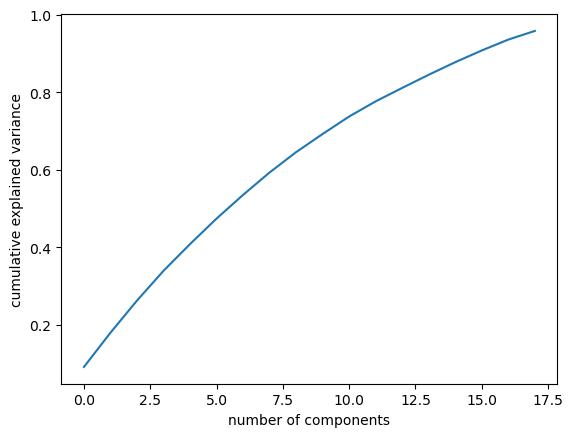

In [42]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Application

In [7]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [8]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data,
                                                           mnist.target,
                                                           test_size = 0.2,
                                                           random_state=0)
from sklearn.preprocessing import StandardScaler

test_img_original = test_img.copy()
print(test_img_original.shape)
scaler = StandardScaler()
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

(14000, 784)


In [9]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(train_img)
print(pca.n_components_) #327 components explain 95% of variance
#print(pca.explained_variance_ratio_)
cs = np.cumsum(pca.explained_variance_ratio_)
print("cumsum of variance", cs)
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

327
cumsum of variance [0.06 0.10 0.14 0.16 0.19 0.21 0.23 0.25 0.26 0.28 0.29 0.30 0.32 0.33
 0.34 0.35 0.36 0.37 0.37 0.38 0.39 0.40 0.41 0.41 0.42 0.43 0.44 0.44
 0.45 0.45 0.46 0.47 0.47 0.48 0.48 0.49 0.49 0.50 0.50 0.51 0.51 0.52
 0.52 0.53 0.53 0.54 0.54 0.55 0.55 0.56 0.56 0.56 0.57 0.57 0.58 0.58
 0.58 0.59 0.59 0.59 0.60 0.60 0.60 0.61 0.61 0.62 0.62 0.62 0.62 0.63
 0.63 0.63 0.64 0.64 0.64 0.65 0.65 0.65 0.66 0.66 0.66 0.66 0.67 0.67
 0.67 0.68 0.68 0.68 0.68 0.69 0.69 0.69 0.69 0.70 0.70 0.70 0.70 0.71
 0.71 0.71 0.71 0.72 0.72 0.72 0.72 0.73 0.73 0.73 0.73 0.73 0.74 0.74
 0.74 0.74 0.75 0.75 0.75 0.75 0.75 0.76 0.76 0.76 0.76 0.76 0.76 0.77
 0.77 0.77 0.77 0.77 0.78 0.78 0.78 0.78 0.78 0.78 0.79 0.79 0.79 0.79
 0.79 0.79 0.80 0.80 0.80 0.80 0.80 0.80 0.81 0.81 0.81 0.81 0.81 0.81
 0.81 0.82 0.82 0.82 0.82 0.82 0.82 0.82 0.83 0.83 0.83 0.83 0.83 0.83
 0.83 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.85 0.85 0.85 0.85 0.85
 0.85 0.85 0.85 0.86 0.86 0.86 0.86 0.86 0.86 0.86 0.8

In [45]:
print(test_img_original.shape)
print(train_img.shape)
print(test_img.shape)

(14000, 784)
(56000, 327)
(14000, 327)


In [10]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver='lbfgs')
logisticRegr.fit(train_img, train_lbl)

C:\Users\Windows 10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
print(logisticRegr.predict(test_img[1].reshape(1,-1)))

['4']


In [12]:
logisticRegr.score(test_img,test_lbl)

0.9187142857142857

Note that the title of each image is the predicted result.


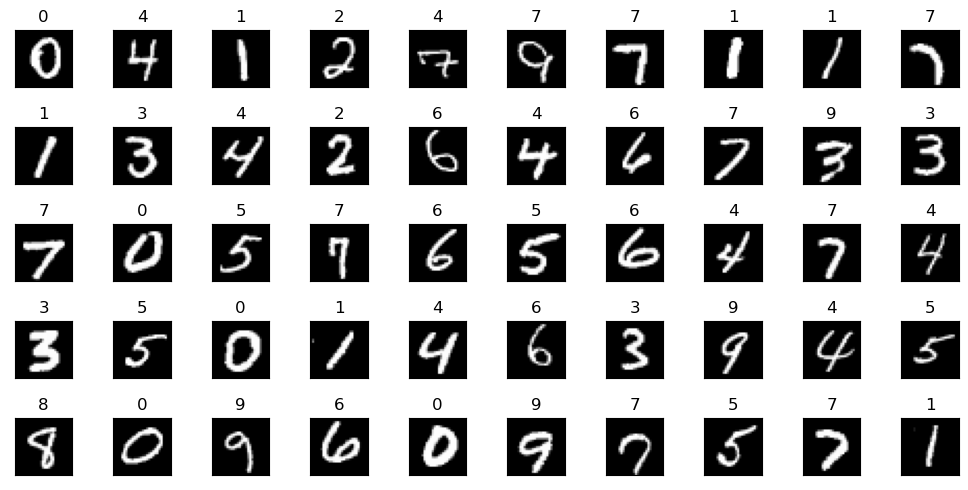

In [13]:
n_rows = 5
n_cols = 10
max_index = n_rows*n_cols
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols, n_rows),
                        subplot_kw={'xticks': [], 'yticks': []})

print("Note that the title of each image is the predicted result.")
for ax, i in zip(axs.flat, range(max_index)):
    # Convert array size 784x1 to 28x28 to be able to plot
    #print(type(test_img_original))
    my_image = np.array(test_img_original.iloc[i], dtype='float')
    pixels = my_image.reshape((28, 28))
    
    # Plot image with color mapping (cmap) in grayscale
    ax.imshow(pixels, cmap='gray')
    # Set title with its result
    result = logisticRegr.predict(test_img[i].reshape(1,-1)) # convert dimension (327,) to (1,327)
    ax.set_title(result[0])

# Display plot
plt.tight_layout()
plt.show()

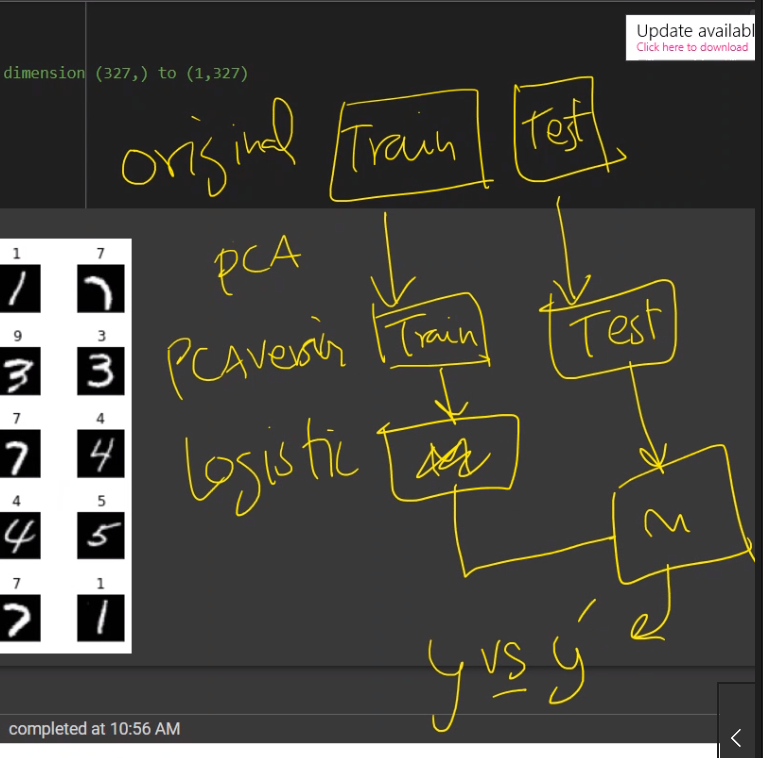